In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bootstrap_fit import bootstrap_fit
import lmfit

In [2]:
def linear_resid(params, x, data=None):
    a = params['a'].value
    b = params['b'].value
    model = a * x + b
    if data is None:
        return model
    return (model - data)

In [3]:
x = np.linspace(0, 10, 100)
y = x * 1 + 5 + np.random.normal(0, 1, len(x))

In [4]:
params = lmfit.Parameters()
params.add('a', value=1)
params.add('b', value=1)
out = bootstrap_fit(
    x, y, linear_resid, params
)

In [5]:
a_list = np.array([o[0].params['a'].value for o in out])
b_list = np.array([o[0].params['b'].value for o in out])

(array([ 2.,  1.,  3.,  4.,  7.,  6.,  6., 11., 18., 20., 29., 26., 34.,
        30., 32., 39., 40., 49., 50., 56., 52., 47., 53., 52., 44., 40.,
        41., 30., 44., 23., 22., 27., 16.,  9.,  7.,  7.,  2.,  5.,  3.,
         5.,  3.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.94349775, 0.94637243, 0.94924711, 0.95212179, 0.95499647,
        0.95787115, 0.96074582, 0.9636205 , 0.96649518, 0.96936986,
        0.97224454, 0.97511922, 0.9779939 , 0.98086857, 0.98374325,
        0.98661793, 0.98949261, 0.99236729, 0.99524197, 0.99811664,
        1.00099132, 1.003866  , 1.00674068, 1.00961536, 1.01249004,
        1.01536472, 1.01823939, 1.02111407, 1.02398875, 1.02686343,
        1.02973811, 1.03261279, 1.03548746, 1.03836214, 1.04123682,
        1.0441115 , 1.04698618, 1.04986086, 1.05273554, 1.05561021,
        1.05848489, 1.06135957, 1.06423425, 1.06710893, 1.06998361,
        1.07285828, 1.07573296, 1.07860764, 1.08148232, 1.084357  ,
        1.08723168]),
 <BarContainer

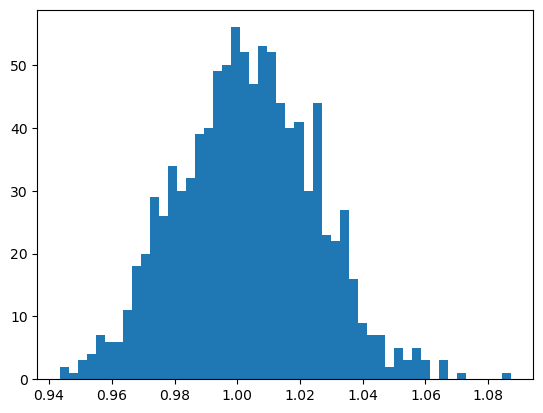

In [12]:
plt.hist(a_list, bins=50)


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  4.,  3.,  3.,  4.,
         6.,  5.,  8., 14., 16., 17., 26., 30., 42., 29., 41., 51., 52.,
        54., 48., 66., 47., 52., 75., 49., 36., 40., 32., 37., 27., 15.,
        12., 10., 13., 15.,  3.,  3.,  3.,  3.,  1.,  2.,  1.]),
 array([4.4517248 , 4.47020783, 4.48869087, 4.5071739 , 4.52565694,
        4.54413997, 4.56262301, 4.58110604, 4.59958908, 4.61807211,
        4.63655515, 4.65503818, 4.67352122, 4.69200425, 4.71048729,
        4.72897032, 4.74745336, 4.76593639, 4.78441943, 4.80290246,
        4.8213855 , 4.83986853, 4.85835157, 4.8768346 , 4.89531764,
        4.91380067, 4.93228371, 4.95076674, 4.96924978, 4.98773281,
        5.00621585, 5.02469888, 5.04318192, 5.06166495, 5.08014799,
        5.09863102, 5.11711406, 5.13559709, 5.15408013, 5.17256316,
        5.1910462 , 5.20952923, 5.22801227, 5.2464953 , 5.26497834,
        5.28346137, 5.30194441, 5.32042744, 5.33891048, 5.35739351,
        5.37587655]),
 <BarContainer

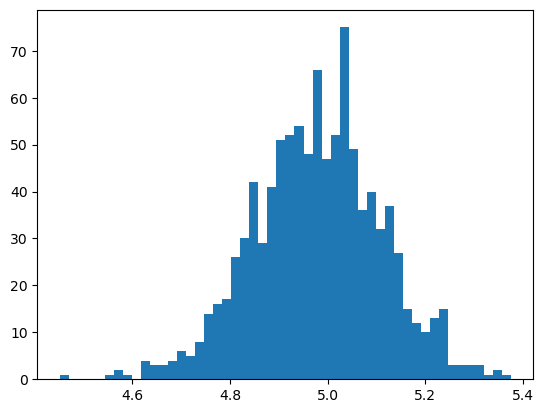

In [11]:
plt.hist(b_list, bins=50)


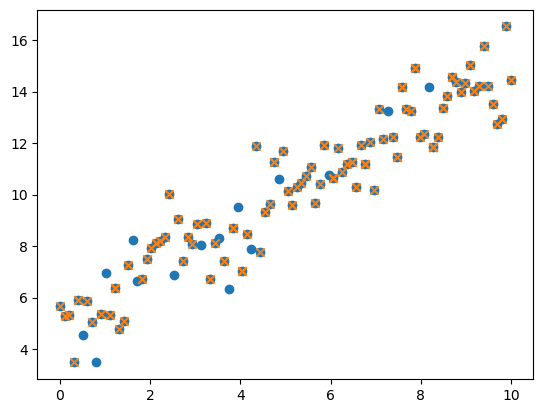

In [8]:
plt.scatter(x, y)

plt.scatter(out[0][1], out[0][2], marker="x")

lmfit.minimize(linear_resid, params, args=(y, x))